# Limpieza y Análisis de URLs Legítimas - Sector Redes Sociales

Este notebook contiene el análisis exploratorio y la limpieza inicial del dataset consolidado de URLs legítimas del sector redes sociales.

## Objetivos

- Evaluar la calidad y cantidad de los datos crudos.  
- Identificar valores nulos, duplicados y otras inconsistencias en las columnas principales.  
- Filtrar filas sin URLs válidas para obtener un dataset limpio y útil para modelado.  
- Documentar cada paso para facilitar la comprensión y reproducibilidad.


In [2]:
import pandas as pd
import os

# Parámetros
base_path = '/Users/test/Desktop/phishing-detector/data/raw/legitimas'
archivo = 'rrss_legitimas_crudo.csv'
ruta_archivo = os.path.join(base_path, archivo)

# Cargar CSV
df_rrss = pd.read_csv(ruta_archivo)

print(f"Dataset cargado para el sector Redes Sociales con {len(df_rrss)} filas.")
print(f"Columnas disponibles: {df_rrss.columns.tolist()}")


Dataset cargado para el sector Redes Sociales con 178 filas.
Columnas disponibles: ['empresa', 'url']


In [3]:
print("Información general del DataFrame:")
print(df_rrss.info())

print("\nValores nulos por columna:")
print(df_rrss.isnull().sum())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   empresa  178 non-null    object
 1   url      178 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB
None

Valores nulos por columna:
empresa    0
url        0
dtype: int64


In [4]:
df_rrss_limpio = df_rrss[df_rrss['url'].notna()].copy()
print(f"Filas tras eliminar URLs nulas: {len(df_rrss_limpio)}")


Filas tras eliminar URLs nulas: 178


In [5]:
import validators

def es_url_valida(url):
    if pd.isna(url):
        return False
    resultado = validators.url(url)
    return resultado is True

df_rrss_limpio['url_valida'] = df_rrss_limpio['url'].apply(es_url_valida)

total_urls = len(df_rrss_limpio)
urls_validas = df_rrss_limpio['url_valida'].sum()
urls_invalidas = total_urls - urls_validas

print(f"Total URLs: {total_urls}")
print(f"URLs válidas: {urls_validas} ({urls_validas / total_urls * 100:.2f}%)")
print(f"URLs inválidas: {urls_invalidas} ({urls_invalidas / total_urls * 100:.2f}%)")

if urls_invalidas > 0:
    print("Ejemplos de URLs inválidas:")
    print(df_rrss_limpio.loc[~df_rrss_limpio['url_valida'], 'url'].head(10))


Total URLs: 178
URLs válidas: 178 (100.00%)
URLs inválidas: 0 (0.00%)


Distribución por empresa:
empresa
LINKEDIN     151
SNAPCHAT      20
TWITTER/X      5
FACEBOOK       2
Name: count, dtype: int64


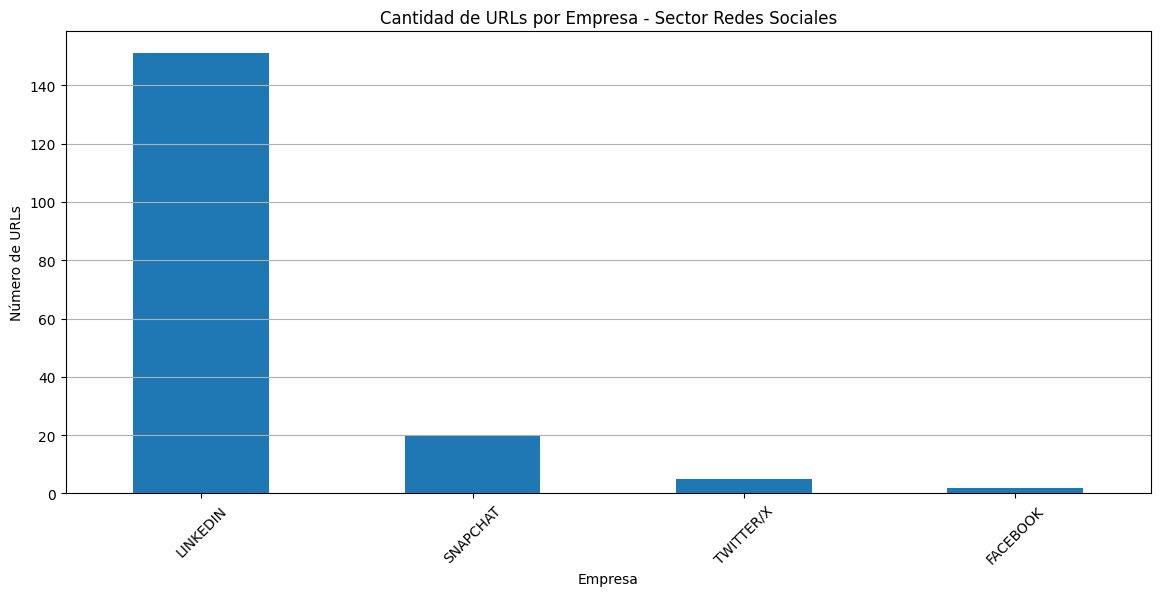

In [6]:
df_rrss_limpio['empresa'] = df_rrss_limpio['empresa'].str.upper().str.strip()

distribucion = df_rrss_limpio['empresa'].value_counts()

print("Distribución por empresa:")
print(distribucion)

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
distribucion.plot(kind='bar')
plt.title('Cantidad de URLs por Empresa - Sector Redes Sociales')
plt.xlabel('Empresa')
plt.ylabel('Número de URLs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [7]:
import os

base_path_processed = '/Users/test/Desktop/phishing-detector/data/processed/legitimas'
os.makedirs(base_path_processed, exist_ok=True)

archivo_limpio = 'rrss_legitimas_limpio.csv'
ruta_guardado = os.path.join(base_path_processed, archivo_limpio)

columnas_relevantes = ['empresa', 'url']

df_modelo = df_rrss_limpio[columnas_relevantes].drop_duplicates()

print(f"Filas tras eliminar duplicados en columnas relevantes: {len(df_modelo)}")

df_modelo.to_csv(ruta_guardado, index=False)

print(f"Dataset limpio guardado en: {ruta_guardado}")


Filas tras eliminar duplicados en columnas relevantes: 178
Dataset limpio guardado en: /Users/test/Desktop/phishing-detector/data/processed/legitimas/rrss_legitimas_limpio.csv
